<a href="https://colab.research.google.com/github/Adamantev/DataSet/blob/main/Foto_RGN_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Установка библиотек**

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

**Импорт библиотек**

In [ ]:
from fastai.vision.all import *

**Загрузка данных**

In [ ]:
path =  Path('/content/gdrive/Othercomputers/Компьютер/Dat_png/treaning')
path_all = Path('/content/gdrive/Othercomputers/Компьютер/Dat_png/test')

In [ ]:
path.ls()

(#4) [Path('/content/gdrive/Othercomputers/Компьютер/Dat_png/treaning/1_wear'),Path('/content/gdrive/Othercomputers/Компьютер/Dat_png/treaning/2_cuff'),Path('/content/gdrive/Othercomputers/Компьютер/Dat_png/treaning/4_norm'),Path('/content/gdrive/Othercomputers/Компьютер/Dat_png/treaning/3_bs')]

Скачивание файлов изображений.

In [ ]:
files = get_image_files(path)

In [ ]:
len(files)

11856

In [ ]:
files[0],files[2]

(Path('/content/gdrive/Othercomputers/Компьютер/Dat_png/treaning/1_wear/test1601.png'),
 Path('/content/gdrive/Othercomputers/Компьютер/Dat_png/treaning/1_wear/test1603.png'))

**Создание датасета**

Используется DataBlock и DataLoader, которые считывает разметку данных с названия папки с помощью функции parent_label.



In [ ]:
IRI_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label)

In [ ]:
IRI_data = IRI_data.new(item_tfms=Resize(224),batch_tfms=aug_transforms(mult=2))

In [ ]:
# bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))

In [ ]:
dls = IRI_data.dataloaders(path)

Просмотр примера изображений

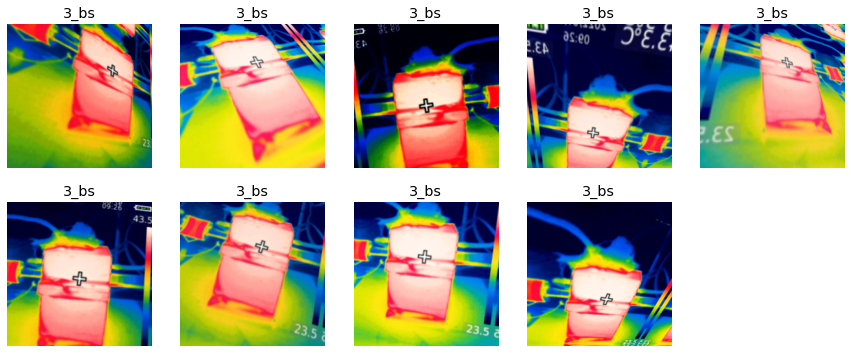

In [ ]:
dls.show_batch(max_n=9, nrows=2, unique=True)

**Обучение**

In [ ]:
#??cnn_learner

In [ ]:
learn = cnn_learner(dls,resnet18,metrics=error_rate,pretrained=True,lr=0.00363)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f370

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Целевая функция

In [ ]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

Метод поиска экстремума

In [ ]:
learn.opt_func

<function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

Подбор скорости обучения
Строку ниже можно закоментировать. Для случая трансферного обучения resnet18 рекомендуемая скорость обучения lr
SuggestedLRs(valley=0.0014454397605732083)

для resnet34
SuggestedLRs(valley=0.00363078061491251

In [ ]:
# hide
# learn.lr_find()

In [ ]:
learn.fine_tune(3)

SuggestedLRs(valley=5.248074739938602e-05)

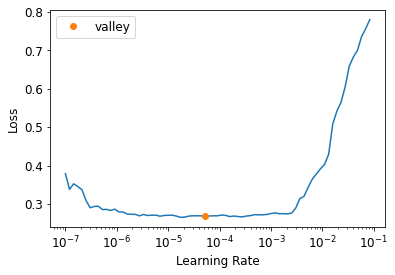

In [ ]:
learn.lr_find()

**Результаты**

Предсказание для любого конкретного изображения

In [ ]:
learn.predict(files[101]),files[101]

(('1_wear',
  TensorBase(0),
  TensorBase([1.0000e+00, 1.5706e-13, 1.0650e-16, 1.3965e-14])),
 Path('/content/gdrive/Othercomputers/Компьютер/Dat_png/treaning/1_wear/test1752.png'))

Визуализация предсказаний.

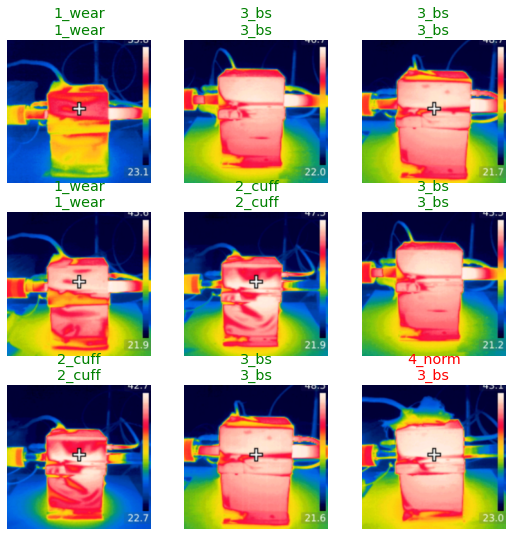

In [ ]:
learn.show_results()

Визуализация топа ошибок.

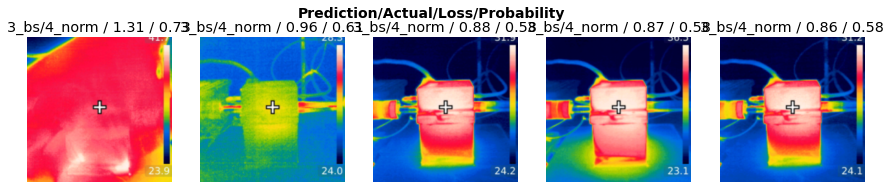

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5, nrows=1)

**Оценка точности**

Матрица ошибок

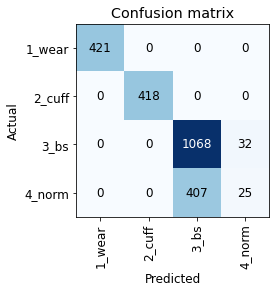

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

      1_wear       1.00      1.00      1.00       421
      2_cuff       1.00      1.00      1.00       418
        3_bs       0.72      0.97      0.83      1100
      4_norm       0.44      0.06      0.10       432

    accuracy                           0.81      2371
   macro avg       0.79      0.76      0.73      2371
weighted avg       0.77      0.81      0.76      2371



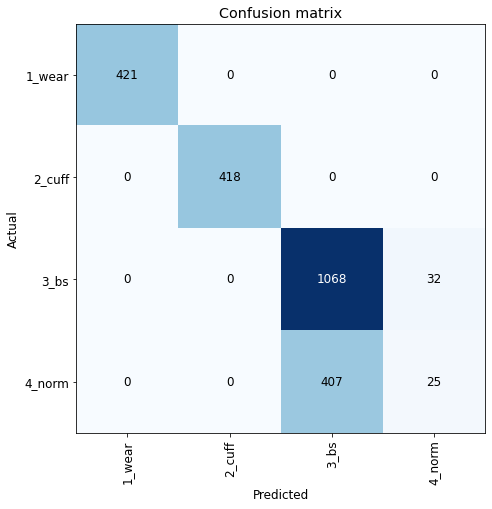

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

From the book:
Remember that a model consists of two parts: the architecture and the trained parameters. The easiest way to save the model is to save both of these, because that way when you load a model you can be sure that you have the matching architecture and parameters. To save both parts, use the export method.

This method even saves the definition of how to create your DataLoaders. This is important, because otherwise you would have to redefine how to transform your data in order to use your model in production. fastai automatically uses your validation set DataLoader for inference by default, so your data augmentation will not be applied, which is generally what you want.

When you call export, fastai will save a file called "export.pkl":

Сохранение обученной сети

In [ ]:
learn.export()

Проверка результатов сохранения

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

Использование обученной сети для предсказаний на новых данных.

In [ ]:
learn_inf = load_learner(path_all/'/content/export.pkl')

In [ ]:
files_test = get_image_files(path_all/'/content/gdrive/Othercomputers/Компьютер/Dat_png/test')

In [ ]:
len(files_test)

5914

Предсказание на тестовых изображениях

Одно изображение

In [ ]:
learn_inf.predict(files_test[4])

('3_bs', TensorBase(2), TensorBase([0.1657, 0.0128, 0.4176, 0.4039]))

Вся папка

In [ ]:
def func_accuracy(files_test):
  tp, tn, fp, fn, acc = 0, 0, 0, 0, 0
  feed = [0]*len(files_test)
  pred = [0]*len(files_test)
  gtrue = [0]*len(files_test)
  labels_voc = learn_inf.dls.vocab # labels
  for ind, o in enumerate(files_test):
    feed[ind] = learn_inf.predict(o)
    pred[ind] = labels_voc[feed[ind][-1].argmax()]
    #gtrue[ind] =feed[ind][0]
    gtrue[ind] = str(o).split('/')[-2]
    acc += int(gtrue[ind] == pred[ind])
    #print(gtrue[ind], pred[ind])
  return acc/len(files_test)

In [ ]:
func_accuracy(files_test)

0.6756848156915793

Ссылки:

https://github.com/avkornaev/Fast_AI_course/blob/main/02_production_v3_online.ipynb

https://docs.fast.ai/tutorial.medical_imaging.html

https://docs.fast.ai/data.block.html#DataBlock


